#### **Decision Tree Regression**


**Import Necessary Libraries**


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

**Load and Explore the Dataset**


In [18]:
data = pd.read_csv("Population_Vs_Profit.csv")

In [19]:
data.head()

,Population,Profit
0,5.5277,9.1302
1,5.8598,6.8233
2,7.4764,4.3483
3,17.5800,16.4850
4,6.4862,6.5987


In [20]:
data.shape

(105, 2)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  105 non-null    float64
 1   Profit      105 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,105.0,9.282954,4.758356,5.0269,5.7292,7.2259,11.7000,22.203
Profit,105.0,6.766483,6.235208,-2.6807,2.4406,5.1337,9.0551,24.147


**Separate Features and Target Variable**


In [23]:
X = data.drop("Profit", axis=1).values
y = data["Profit"].values.reshape(-1, 1)

**Visualize The Relationship Between Feature And Target**


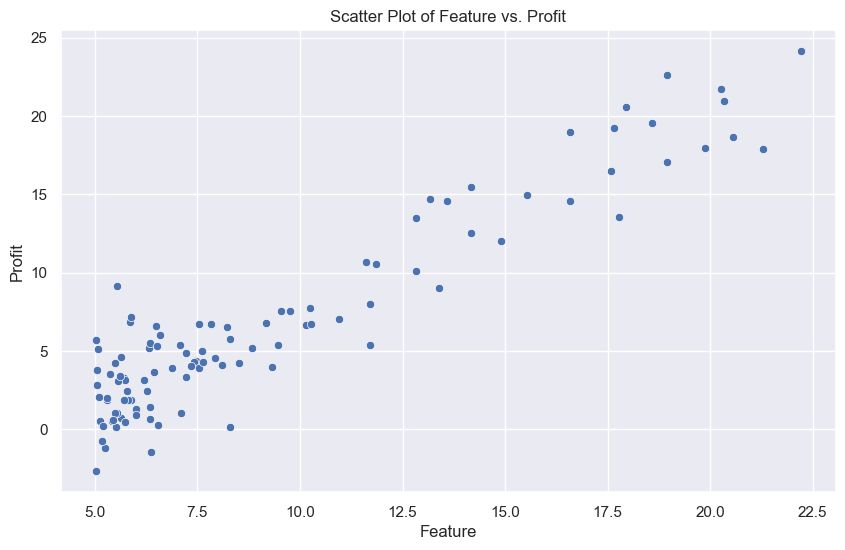

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.ravel(), y=y.ravel())
plt.title("Scatter Plot of Feature vs. Profit")
plt.xlabel("Feature")
plt.ylabel("Profit")
plt.show()

**Feature Scaling**


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

**Train Decision Tree Regressor Model**


In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_scaled, y_scaled)

DecisionTreeRegressor(max_depth=3)

**Make Predictions and Evaluate the Model**


In [29]:
y_pred_scaled = regressor.predict(X_scaled).reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred_scaled)

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y, y_pred)

0.8959197568502529

**Visualize the Results**


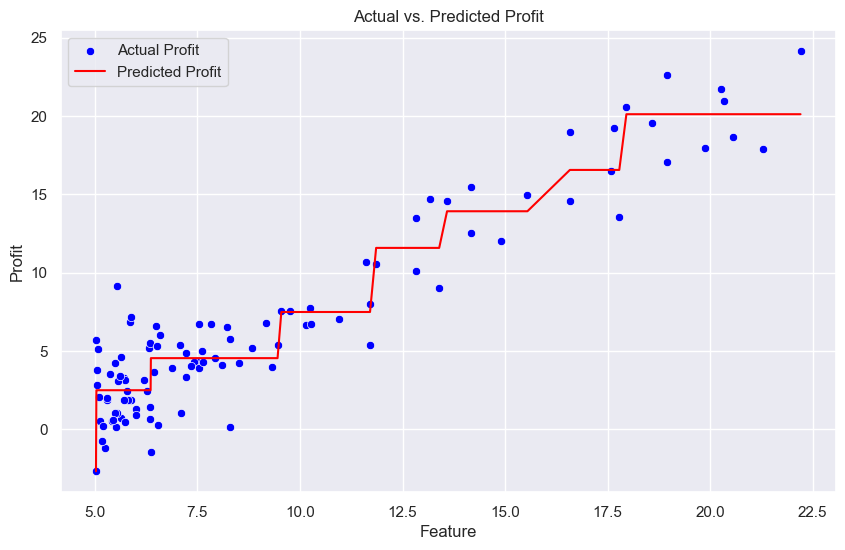

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.ravel(), y=y.ravel(), color="blue", label="Actual Profit")
sns.lineplot(x=X.ravel(), y=y_pred.ravel(), color="red", label="Predicted Profit")
plt.title("Actual vs. Predicted Profit")
plt.xlabel("Feature")
plt.ylabel("Profit")
plt.legend()
plt.show()